# Análisis Exploratorio 
## House Prices: Advanced Regression Techniques

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Cargar los datos
df = pd.read_csv("dataset/train.csv")

# Revisar dimensiones del dataset
print(f"Dimensiones del dataset: {df.shape}")

# Obtener información del dataset
df.info()



Dimensiones del dataset: (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1

In [4]:
# Obtener estadísticas descriptivas
print(df.describe())

# Revisar datos nulos
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Valores nulos en cada columna:")
print(missing_values)

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

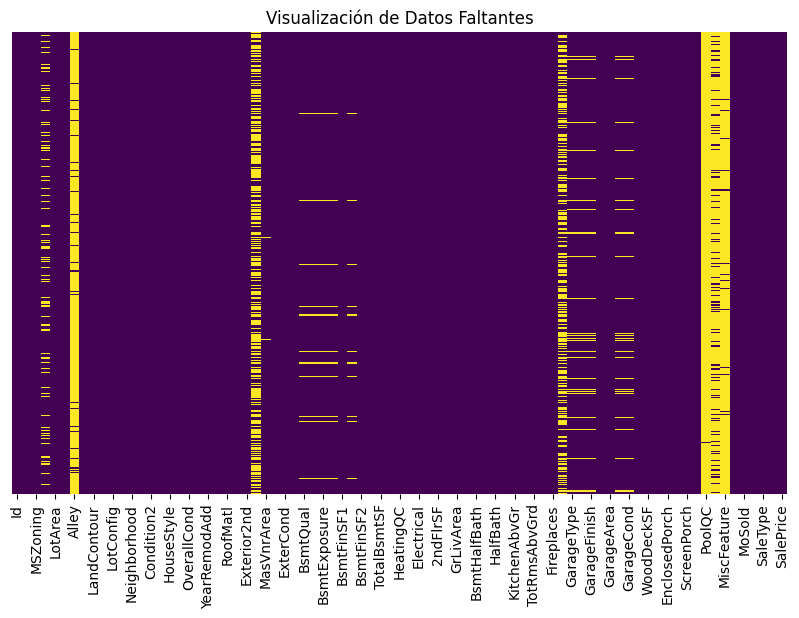

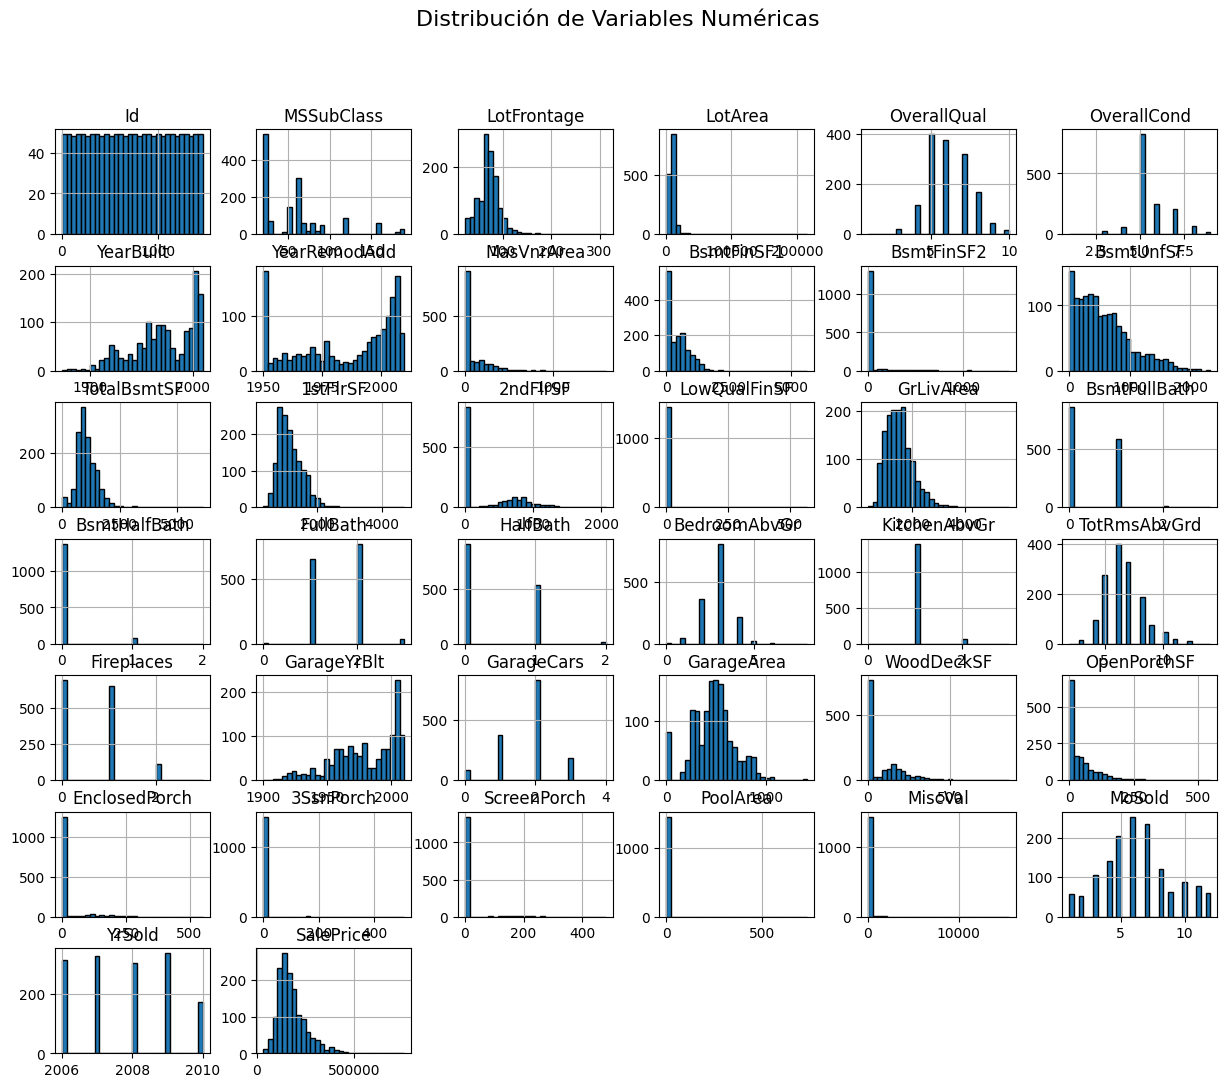

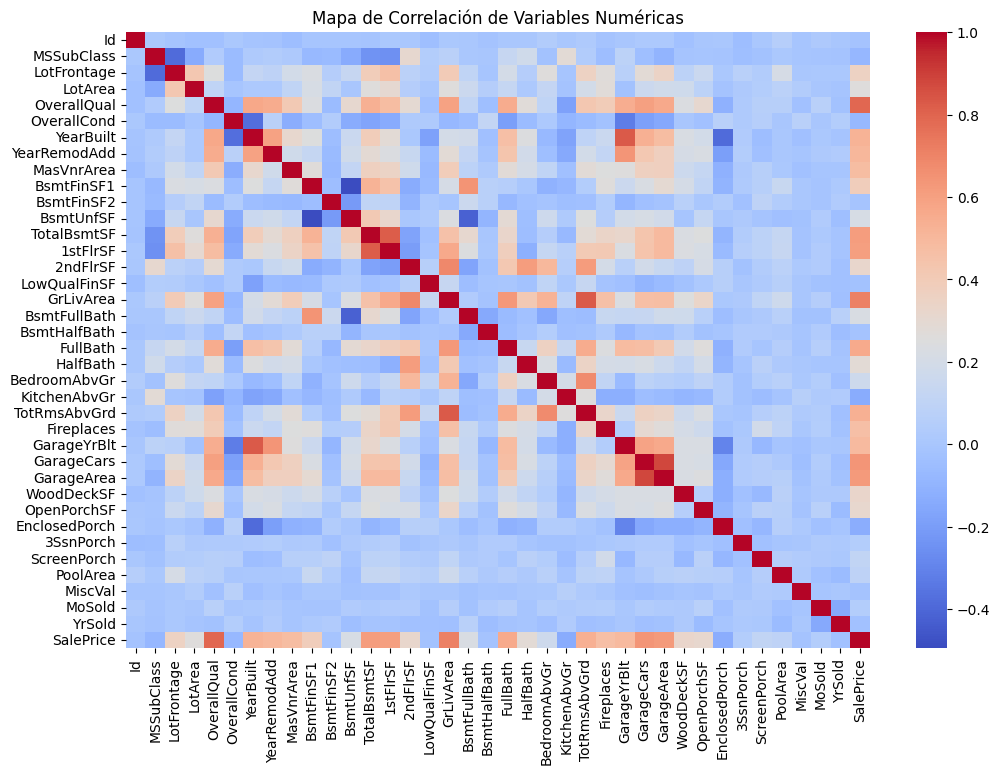

Top Variables Correlacionadas con SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [5]:


# Visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Visualización de Datos Faltantes")
plt.show()

# Gráficos de histogramas de variables numéricas
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.suptitle("Distribución de Variables Numéricas", fontsize=16)
plt.show()

# Mapa de calor de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=False, cmap="coolwarm")
plt.title("Mapa de Correlación de Variables Numéricas")
plt.show()

# Selección de las variables más correlacionadas con SalePrice
correlation_matrix = df_numeric.corr()
top_corr_features = correlation_matrix["SalePrice"].sort_values(ascending=False).head(10)
print("Top Variables Correlacionadas con SalePrice:")
print(top_corr_features)